In [1]:
from search import GraphSearch
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import pickle

In [2]:
client = GraphSearch(password='pswd')

In [3]:
edges, neighbors = client.get_region('tensorflow')
df = pd.DataFrame(data=edges)

In [4]:
df

,from,to,from_weight,to_weight,edge_weight
0,server,model,135,154,1
1,server,computation,135,42,1
2,server,page,135,92,2
3,server,code,135,221,1
4,server,device,135,107,2
...,...,...,...,...,...
709,mcu,model,2,154,1
710,mcu,tensor,2,15,1
711,mcu,utensor,2,5,1
712,ml.net,machine-learning,1,60,1


In [5]:
scores = client.get_scores()

In [6]:
score_sum = sum([scores[node] for node in neighbors])
neighbor_scores = {}
for node in neighbors:
    neighbor_scores[node] = scores[node] / score_sum

In [7]:
sum([neighbor_scores[name] for name in neighbors])

1.0000000000000002

In [8]:
for node in neighbors:
    neighbor_scores[node] /= neighbor_scores['tensorflow']

In [9]:
sorted_neighbors = sorted(neighbor_scores, key=neighbor_scores.get, reverse=True)

In [10]:
for node in sorted_neighbors:
    print(node, neighbor_scores[node])

deep-learning 4.755088336690546
python 4.24184981613075
neural-network 3.9135532054050985
model 3.7558707590597495
datum 3.084933149279759
language 2.8674185071891434
google 2.760963222672816
machine-learning 2.6359627770708562
programming 2.1409277752079756
keras 2.018653359530306
software 1.9876012666650886
example 1.8334460061192588
utensor 1.5945424898117202
community 1.3387483921216723
code 1.3019315022395805
device 1.2620756252636403
tensor 1.2394659818048652
cloud 1.2225961521523863
api 1.2028054437556244
tensorboard 1.1403237558289976
library 1.116615227319452
edit 1.0498246937944125
cnn 1.0361298910760806
tensorflow 1.0
c++ 0.9925801246033862
server 0.8823955483788222
program 0.8466319550457829
method 0.7975796872976333
step 0.7573995238120987
domain 0.7429923885341527
user 0.7399813428472625
team 0.712844868248804
mcu 0.691972264229181
production 0.6743631727550559
dataset 0.6709889014178484
runtime 0.668355941160644
computation 0.6041432940581882
tensorflow-processing-unit 0

In [11]:
gr = client.get_result('tensorflow')

In [30]:
display_nodes = []
for node in gr.nodes:
    if gr.out_degree(node) > 0:
        display_nodes.append(node)
display_edges = []
for u,v,attr in gr.edges(data=True):
    if u in display_nodes and v in display_nodes:
#         print(u,v,attr)
        display_edges.append((u,v,attr))

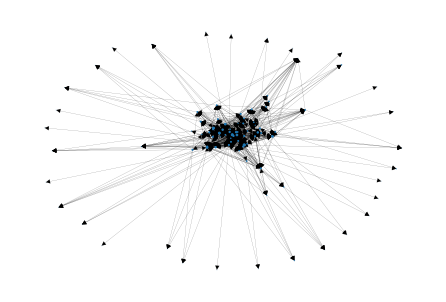

In [31]:
nx.draw_spring(gr, width=0.1, node_size=[neighbor_scores[n] for n in gr.nodes])

In [32]:
G = nx.DiGraph()
for node in display_nodes:
    G.add_node(node, weight=neighbor_scores[node])
G.add_edges_from(display_edges)

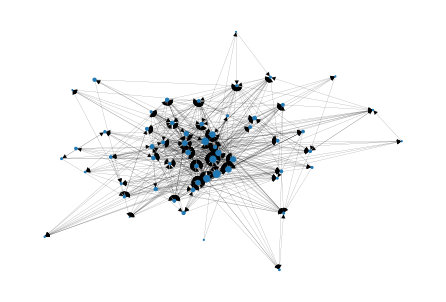

In [35]:
nx.draw_spring(G, width=0.1, node_size=[neighbor_scores[n]*10 for n in G.nodes])

In [36]:
with open('tensorflow-networkx','wb') as f:
    pickle.dump(G, f)

In [20]:
with open('tensorflow-networkx','rb') as f:
    gr = pickle.load(f)

In [21]:
gr